In [7]:
pip install matplotlib

  Using cached kiwisolver-1.3.1-cp38-cp38-win_amd64.whl (51 kB)
  Using cached cycler-0.10.0-py2.py3-none-any.whl (6.5 kB)
Note: you may need to restart the kernel to use updated packages.


In [ ]:
pip install pandas

In [ ]:
pip install numpy

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
traci = pd.read_csv('TRACI_2.csv')
emission = pd.read_csv('NG_flow.csv')

In [3]:
#for data from NREL
df = traci.merge(emission, how='inner', on=['Flow', 'Category', 'Sub-category'])
df['Unit'] = 'kg'
df['Flow impact (kg CO2eq)'] = df['factor (kg CO2 eq)'] * df['Result']
#df.to_csv(r'C:\Users\bourg\Desktop\test.csv', index=True)

In [ ]:
#for data from Ecoinvent
emission[['Category', 'to', 'Sub-category']] = emission.Category.str.split(expand=True)
emission = emission.drop(['to'], axis=1)
emission['Category'] = emission['Category'].str.lower()
df = traci.merge(emission, how='inner', on=['Flow', 'Category', 'Sub-category'])
df['Flow impact (kg CO2eq)'] = df['factor (kg CO2 eq)'] * df['Result']

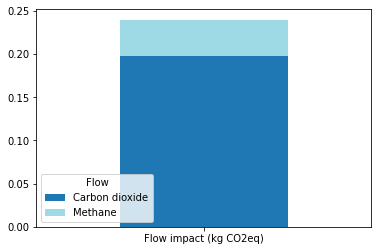

In [4]:
#stacked bar plot for all flows
df_new = df[['Flow', 'Flow impact (kg CO2eq)']].copy()
df1 = df_new.set_index(['Flow'])
df2 = df1.T
ax1 = df2.plot.bar(stacked=True, rot=0, colormap='tab20')

In [ ]:
#link contributions of process to impact factor 
process = pd.read_csv('process_flow.csv')
pcs = traci.merge(process, how='inner', on=['Flow', 'Category', 'Sub-category'])
pcs['Flow impact (kg CO2eq)'] = pcs.iloc[:, 5:].sum(axis=1) * df['factor (kg CO2 eq)']
pcs_new = pcs[['Flow', 'Flow impact (kg CO2eq)']].copy()